정수 삼각형
문제 설명
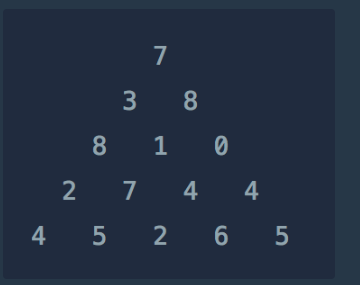

위와 같은 삼각형의 꼭대기에서 바닥까지 이어지는 경로 중, 거쳐간 숫자의 합이 가장 큰 경우를 찾아보려고 합니다. 아래 칸으로 이동할 때는 대각선 방향으로 한 칸 오른쪽 또는 왼쪽으로만 이동 가능합니다. 예를 들어 3에서는 그 아래칸의 8 또는 1로만 이동이 가능합니다.

삼각형의 정보가 담긴 배열 triangle이 매개변수로 주어질 때, 거쳐간 숫자의 최댓값을 return 하도록 solution 함수를 완성하세요.

제한사항
삼각형의 높이는 1 이상 500 이하입니다.
삼각형을 이루고 있는 숫자는 0 이상 9,999 이하의 정수입니다.
입출력 예
triangle	result
[[7], [3, 8], [8, 1, 0], [2, 7, 4, 4], [4, 5, 2, 6, 5]]	30

In [ ]:
def solution(triangle):
    height = len(triangle)
    
    # 맨 아래층의 값들로 초기화합니다.
    dp = triangle[-1]
    
    # 아래에서부터 위로 올라가며 최대값을 계산합니다.
    for i in range(height - 2, -1, -1):
        for j in range(len(triangle[i])):
            dp[j] = max(dp[j], dp[j + 1]) + triangle[i][j]
    
    answer = dp[0]  # 맨 꼭대기에 도달한 후의 최대값이 정답입니다.
    return answer

1. height = len(triangle) : 주어진 triangle 리스트의 높이(층 수)를 height 변수에 저장합니다.

2. dp = triangle[-1] : dp 배열을 초기화하는데, 이 배열은 각 층의 노드가 자신을 거쳐서 얻을 수 있는 최대값을 저장하는 역할을 합니다. 초기값으로는 맨 아래층의 숫자들을 사용합니다.

3. for i in range(height - 2, -1, -1): : triangle의 높이에서 2를 뺀 값부터 0까지 역순으로 순회하는 반복문입니다. 즉, 맨 아래층부터 위로 올라가며 각 층의 노드를 확인합니다.

4. for j in range(len(triangle[i])): : 현재 층의 노드 수만큼 반복하는 반복문입니다. 현재 층에서의 각 노드를 확인합니다.

5. dp[j] = max(dp[j], dp[j + 1]) + triangle[i][j] : 현재 노드의 값과 아래 층에서의 두 개의 값 중 더 큰 값을 선택하여 현재 노드에 더한 뒤, dp[j]에 저장합니다. 이렇게 하면 아래에서부터 위로 올라가면서 각 노드의 최대값을 계산하게 됩니다.

6. answer = dp[0] : 맨 꼭대기에 도달한 후의 최대값을 answer 변수에 저장합니다.

7. return answer : 계산된 최대값을 반환합니다.

In [7]:
from collections import Counter

def solution(pouches):
    # 모든 원소를 하나의 문자열로 합치기
    combined_string = "".join(pouches)
    
    # 알파벳 별 빈도수 계산
    alphabet_counts = Counter(combined_string)
    
    # 가장 적게 선택된 알파벳 순으로 pouches 정렬
    sorted_pouches = sorted(pouches, key=lambda inside: min(alphabet_counts[char] for char in inside))
    
    # 빈도수가 가장 큰 알파벳 선택
    selected_alphabet = max(alphabet_counts, key=alphabet_counts.get)
    
    # 선택한 알파벳의 빈도수와 나머지 알파벳의 빈도 합 비교
    selected_count = alphabet_counts[selected_alphabet]
    remaining_count = sum(count for letter, count in alphabet_counts.items() if letter != selected_alphabet)
    
    # 조건을 만족하면 선택한 알파벳의 빈도수 반환, 그렇지 않으면 0 반환
    if selected_count > remaining_count:
        return selected_count
    else:
        return 0

# 입력 예시와 출력 결과
test_cases = [
    (["cab", "adaaa", "e"], 3),
    (["aabb", "baba"], 0),
    (["d", "a", "e", "d", "abdcc"], 3),
    (["a"], 1)
]

for pouches, expected in test_cases:
    result = solution(pouches)
    print(f"Input: {pouches}, Expected: {expected}, Output: {result}")


Input: ['cab', 'adaaa', 'e'], Expected: 3, Output: 5
Input: ['aabb', 'baba'], Expected: 0, Output: 0
Input: ['d', 'a', 'e', 'd', 'abdcc'], Expected: 3, Output: 0
Input: ['a'], Expected: 1, Output: 1
